In [1]:
# Resaerch application Model
# XGBoost model for product preference prediction. 
# The dataset contain 30 columns and over 300000 entries

# Goals for this model
# -- To build a predictive model that can effectively predict customer prefernces
# -->> Pprocessing Steps
# -->> Hndeling of any missing or duplicate. 
# -->> Perform Label and or 1 hot encoding techniqus for categorical variables
# -->> 
# -- To evaluate the predictive performance of the model 
# -- To assess the models interpretiability
# -- To evalute how the model handles big amounts of data (scalability)
# -- To assess the models complexity 

# ABout Datset
# Contains over 3000 000 records 
# Contains information regarding customers purchasing behaviours (demographic data, temporial data)
# Contains over 30 columns/ features

# Goals for both model (ML model of XGBoost models and DL model of RNN)
# To idetify which model yeilds greater acuuracy
# Whch model handles bigger amounts of data better
# To identifying which approach offers clearer insights into the factors driving predictions.

In [2]:
!pip install xgboost


In [3]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
# pandas is used for data manipulation and analysis
import pandas as pd

#loads the data from excel into a dataframe 
df = pd.read_csv('retail_data.csv')
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
# Check for missing values
df.isnull().sum()


Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [7]:
# ok  based on this output i can see that there are several values missing in the columns
# Im going to drop non-essential columns that are not likely to contribute to the model. 

In [8]:
# Drop irrelevant columns
df = df.drop(['Name', 'Email', 'Phone', 'Address'], axis=1)

In [9]:
# Checking to see if Name, EMail, Phone and address was sucessfully deleted
df.head()

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [10]:
# For columns with numerical values i have decided to Fill with the median

# Fill missing numerical values with the median
df['Total_Purchases'].fillna(df['Total_Purchases'].median(), inplace=True)
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Total_Amount'].fillna(df['Total_Amount'].median(), inplace=True)

In [11]:
# For columns with product category i have decided to Fill with the most frequent (mode)

# Fill missing categorical values with the mode (most frequent value)
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)
df['Product_Brand'].fillna(df['Product_Brand'].mode()[0], inplace=True)
df['Shipping_Method'].fillna(df['Shipping_Method'].mode()[0], inplace=True)
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)
df['Order_Status'].fillna(df['Order_Status'].mode()[0], inplace=True)

In [12]:
# For columns with product category i have decided to Fill with the most frequent (mode)

df['Ratings'].fillna(df['Ratings'].mode()[0], inplace=True)

In [13]:
# Check to see if missing values  have been correctly filled
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback            184
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64

In [14]:
# Decided to drop these tables as they are identifiers that don't directly contribute to predicting customer preferences
df = df.drop(['Transaction_ID', 'Customer_ID'], axis=1)


In [15]:
# filling missing demographic data with unknown
df['City'].fillna('Unknown', inplace=True)
df['State'].fillna('Unknown', inplace=True)
df['Zipcode'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)


In [16]:
# Fill missing values with the median, as it's a numeric column
df['Age'].fillna(df['Age'].median(), inplace=True)



In [17]:
# Step 1: manually mapping the categorical values ('Low', 'Medium', 'High') to numerical values (1, 2, 3)
income_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['Income'] = df['Income'].map(income_mapping)

# Fill missing values in the 'Income' column with the median
df['Income'].fillna(df['Income'].median(), inplace=True)


In [18]:
# Check to see if missing values  have been correctly filled
df.isnull().sum()

City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender              317
Income                0
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback            184
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64

In [19]:
# which won’t distort the data
df['Gender'].fillna('Unknown', inplace=True)


In [20]:
df['Feedback'].fillna('Unknown', inplace=True)


In [21]:
# Decided to Fill with unknown as a neutral category for missing values, 
# which allows the model to handle it separately without introducing bias
df['Customer_Segment'].fillna('Unknown', inplace=True)


In [22]:
# Decided to drop these missing values as it is crucial to the prediction.
# Since its only a small amount of missing values it wont affect the model and overall size of dataset
# Drop rows where any of Date, Year, Month, or Time is missing
df.dropna(subset=['Date', 'Year', 'Month', 'Time'], inplace=True)


In [23]:
# Check to see if missing values  have been correctly filled
df.isnull().sum()

City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300680 entries, 0 to 302009
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   City              300680 non-null  object 
 1   State             300680 non-null  object 
 2   Zipcode           300680 non-null  object 
 3   Country           300680 non-null  object 
 4   Age               300680 non-null  float64
 5   Gender            300680 non-null  object 
 6   Income            300680 non-null  float64
 7   Customer_Segment  300680 non-null  object 
 8   Date              300680 non-null  object 
 9   Year              300680 non-null  float64
 10  Month             300680 non-null  object 
 11  Time              300680 non-null  object 
 12  Total_Purchases   300680 non-null  float64
 13  Amount            300680 non-null  float64
 14  Total_Amount      300680 non-null  float64
 15  Product_Category  300680 non-null  object 
 16  Product_Brand     300680 

In [25]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows with all columns
df.head()



,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,Dortmund,Berlin,77985.0,Germany,21.0,Male,1.0,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,Nottingham,England,99071.0,UK,19.0,Female,1.0,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,Geelong,New South Wales,75929.0,Australia,48.0,Male,1.0,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,Edmonton,Ontario,88420.0,Canada,56.0,Male,3.0,Premium,05-08-23,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,Bristol,England,48704.0,UK,22.0,Male,1.0,Premium,01-10-24,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [26]:
# Reset display options to default
# pd.reset_option('display.max_columns')

In [27]:
# Drop the 'Zipcode' column
df = df.drop(['Zipcode'], axis=1)


In [28]:
# One-hot encode the nominal categorical columns
df = pd.get_dummies(df, columns=['City', 'State', 'Country', 'Product_Category', 
                                 'Product_Brand', 'Product_Type', 'Feedback', 
                                 'Shipping_Method', 'Payment_Method', 'Order_Status', 
                                 'Gender', 'Customer_Segment', 'products'])


In [29]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract useful components from 'Date'
df['Day'] = df['Date'].dt.day  # Extract day
df['Month'] = df['Date'].dt.month  # Extract month
df['Year'] = df['Date'].dt.year  # Extract year

# Extract the hour from 'Time'
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Drop the original 'Date' and 'Time' columns since they've been processed
df = df.drop(['Date', 'Time'], axis=1)

# Verify the changes by checking the first few rows
df.head()



,Age,Income,Year,Month,Total_Purchases,Amount,Total_Amount,Ratings,City_Adelaide,City_Albuquerque,City_Albury-Wodonga,City_Arlington,City_Atlanta,City_Austin,City_Ballarat,City_Baltimore,City_Barrie,City_Belfast,City_Bendigo,City_Berlin,City_Bielefeld,City_Birmingham,City_Bochum,City_Bonn,City_Boston,City_Bremen,City_Brighton,City_Brisbane,City_Bristol,City_Cairns,City_Calgary,City_Canberra,City_Cardiff,City_Charlotte,City_Chicago,City_Cleveland,City_Cologne,City_Colorado Springs,City_Columbus,City_Dallas,City_Darwin,City_Denver,City_Detroit,City_Dortmund,City_Dresden,City_Duisburg,City_Düsseldorf,City_Edinburgh,City_Edmonton,City_El Paso,City_Essen,City_Fort Worth,City_Frankfurt,City_Fresno,City_Geelong,City_Glasgow,City_Gold Coast,City_Halifax,City_Hamburg,City_Hamilton,City_Hanover,City_Hobart,City_Houston,City_Hull,City_Indianapolis,City_Jacksonville,City_Kansas City,City_Kelowna,City_Kitchener,City_Las Vegas,City_Launceston,City_Leeds,City_Leicester,City_Leipzig,City_Liverpool,City_London,City_Long Beach,City_Los Angeles,City_Louisville,City_Mackay,City_Manchester,City_Melbourne,City_Memphis,City_Mesa,City_Miami,City_Milwaukee,City_Minneapolis,City_Montreal,City_Munich,City_Münster,City_Nashville,City_New Orleans,City_New York,City_Newcastle,City_Newcastle upon Tyne,City_Nottingham,City_Nuremberg,City_Oakland,City_Oklahoma City,City_Omaha,City_Oshawa,City_Ottawa,City_Oxford,City_Perth,City_Philadelphia,City_Phoenix,City_Plymouth,City_Portland,City_Portsmouth,City_Quebec City,City_Raleigh,City_Regina,City_Sacramento,City_San Antonio,City_San Diego,City_San Francisco,City_San Jose,City_Saskatoon,City_Seattle,City_Sheffield,City_Southampton,City_St. John's,City_Stuttgart,City_Sydney,City_Toowoomba,City_Toronto,City_Townsville,City_Tucson,City_Tulsa,City_Unknown,City_Vancouver,City_Victoria,City_Virginia Beach,City_Washington,City_Wichita,City_Windsor,City_Winnipeg,City_Wollongong,City_Wuppertal,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_Berlin,State_California,State_Colorado,State_Connecticut,State_Delaware,State_England,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New South Wales,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Ontario,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Unknown,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Country_Australia,Country_Canada,Country_Germany,Country_UK,Country_USA,Country_Unknown,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home Decor,Product_Brand_Adidas,Product_Brand_Apple,Product_Brand_Bed Bath & Beyond,Product_Brand_BlueStar,Product_Brand_Coca-Cola,Product_Brand_HarperCollins,Product_Brand_Home Depot,Product_Brand_IKEA,Product_Brand_Mitsubhisi,Product_Brand_Nestle,Product_Brand_Nike,Product_Brand_Penguin Books,Product_Brand_Pepsi,Product_Brand_Random House,Product_Brand_Samsung,Product_Brand_Sony,Product_Brand_Whirepool,Product_Brand_Zara,Product_Type_Bathroom,Product_Type_Bedding,Product_Type_BlueStar AC,Product_Type_Children's,Product_Type_Chocolate,Product_Type_Coffee,Product_Type_Decorations,Product_Type_Dress,Product_Type_Fiction,Product_Type_Fridge,Product_Type_Furniture,Product_Type_Headphones,Product_Type_Jacket,Product_Type_Jeans,Product_Type_Juice,Product_Type_Kitchen,Product_Type_Laptop,Product_Type_Lighting,Product_Type_Literature,Product_Type_Mitsubishi 1.5 Ton 3 Star Split AC,Product_Type_Non-Fiction,Product_Type_Shirt,Product_Type_Shoes,Product_Type_Shorts,Product_Type_Smartphone,Product_Type_Snacks

In [30]:
# Print the column names to verify one-hot encoding
print(df.columns)


Index(['Age', 'Income', 'Year', 'Month', 'Total_Purchases', 'Amount',
       'Total_Amount', 'Ratings', 'City_Adelaide', 'City_Albuquerque',
       ...
       'products_Windbreaker', 'products_Window AC',
       'products_Wireless headphones', 'products_Wrap dress',
       'products_Wrench', 'products_Xiaomi Mi', 'products_iPad',
       'products_iPhone', 'Day', 'Hour'],
      dtype='object', length=599)


In [31]:
# Define features (X) and target (y)
X = df.drop(['Ratings'], axis=1)  # Drop 'Ratings' as it's the target
y = df['Ratings']  # Target variable


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.16345579973475963
R-squared: 0.9060940108294496


In [36]:
from sklearn.metrics import accuracy_score
import numpy as np

# Round the predicted values to the nearest whole number (assuming ratings are integers)
y_pred_class = np.round(y_pred)

# Calculate the accuracy by comparing the actual values with the predicted values
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 67.47%


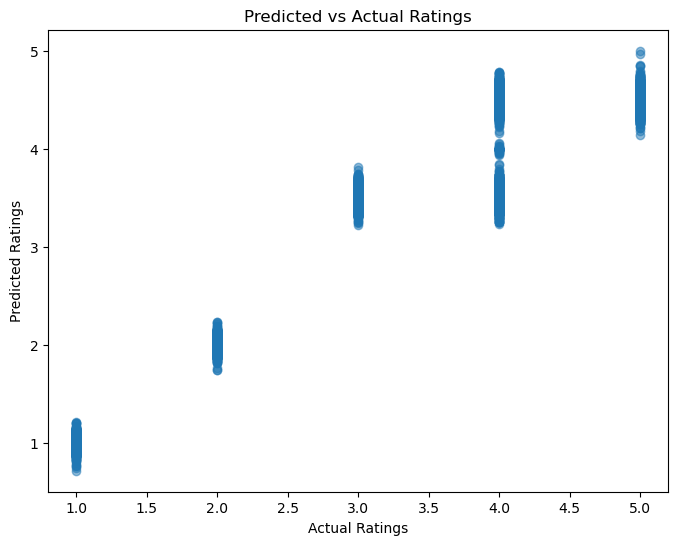

In [37]:
import matplotlib.pyplot as plt

# To visualize how close the predicted ratings are to the actual ratings

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


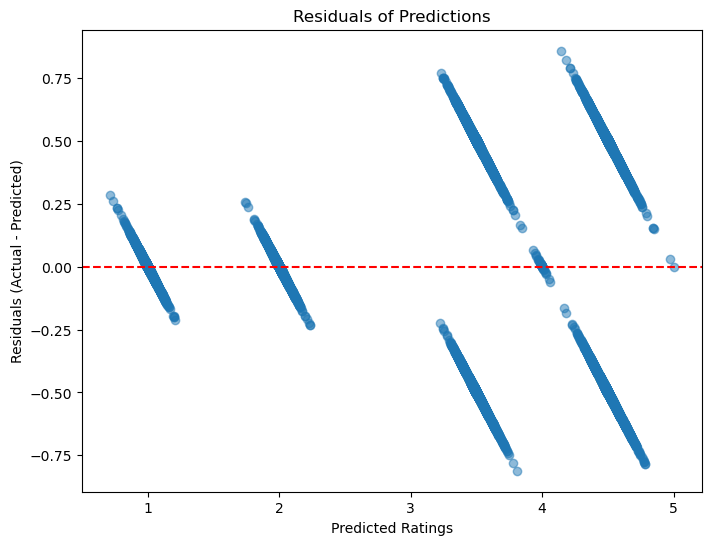

In [38]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


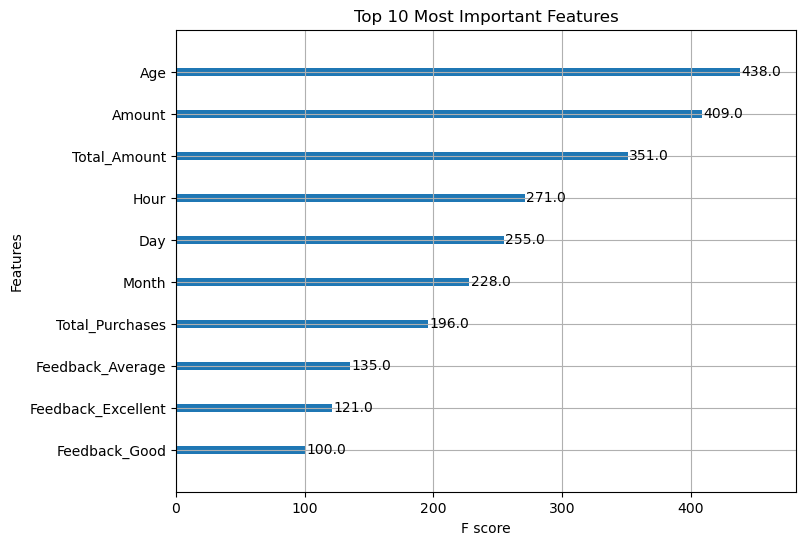

In [39]:
import matplotlib.pyplot as plt
# Checking to see  which features contributed the most to the model's predictions
# Plot the feature importance from XGBoost
fig, ax = plt.subplots(figsize=(8, 6))  # Define figure size here
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, ax=ax)
plt.title('Top 10 Most Important Features')
plt.show()



In [40]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


In [41]:
# Initialize XGBoost with the best hyperparameters
xgb_model_optimized = xgb.XGBRegressor(
    colsample_bytree=0.9,
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.9,
    objective='reg:squarederror',
    random_state=42
)

# Train the model on the training data
xgb_model_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = xgb_model_optimized.predict(X_test)

# Evaluate the performance (using MSE, R-squared, or other metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R-squared: {r2_optimized}")


Optimized Mean Squared Error: 0.16188524077210742
Optimized R-squared: 0.9069963030281838


In [42]:
# Convert predictions to their rounded values (if predicting categories)
y_pred_rounded = [round(pred) for pred in y_pred_optimized]

# Calculate accuracy by comparing predictions to true values
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_rounded)

print(f"Optimized Accuracy: {accuracy * 100:.2f}%")


Optimized Accuracy: 67.46%


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model_optimized, X, y, cv=5, scoring='neg_mean_squared_error')
print("Mean cross-validated MSE:", -scores.mean())


Mean cross-validated MSE: 0.16219427092192368


In [44]:

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.9,
    gamma=0,
    n_estimators=50,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum tree depth
    objective='reg:squarederror',  # Loss function for regression
    random_state=42
)

# Define the evaluation set for tracking performance
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with tracking enabled (passing parameters through `fit()`)
xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True
)




[0]	validation_0-rmse:1.20170	validation_1-rmse:1.20036
[1]	validation_0-rmse:1.09590	validation_1-rmse:1.09457
[2]	validation_0-rmse:1.00204	validation_1-rmse:1.00072
[3]	validation_0-rmse:0.91922	validation_1-rmse:0.91792
[4]	validation_0-rmse:0.85894	validation_1-rmse:0.85785
[5]	validation_0-rmse:0.79276	validation_1-rmse:0.79166
[6]	validation_0-rmse:0.73505	validation_1-rmse:0.73396
[7]	validation_0-rmse:0.68455	validation_1-rmse:0.68346
[8]	validation_0-rmse:0.64091	validation_1-rmse:0.63985
[9]	validation_0-rmse:0.60326	validation_1-rmse:0.60222
[10]	validation_0-rmse:0.57094	validation_1-rmse:0.56993
[11]	validation_0-rmse:0.54336	validation_1-rmse:0.54238
[12]	validation_0-rmse:0.51994	validation_1-rmse:0.51900
[13]	validation_0-rmse:0.50017	validation_1-rmse:0.49927
[14]	validation_0-rmse:0.48356	validation_1-rmse:0.48270
[15]	validation_0-rmse:0.46948	validation_1-rmse:0.46865
[16]	validation_0-rmse:0.45793	validation_1-rmse:0.45715
[17]	validation_0-rmse:0.44825	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

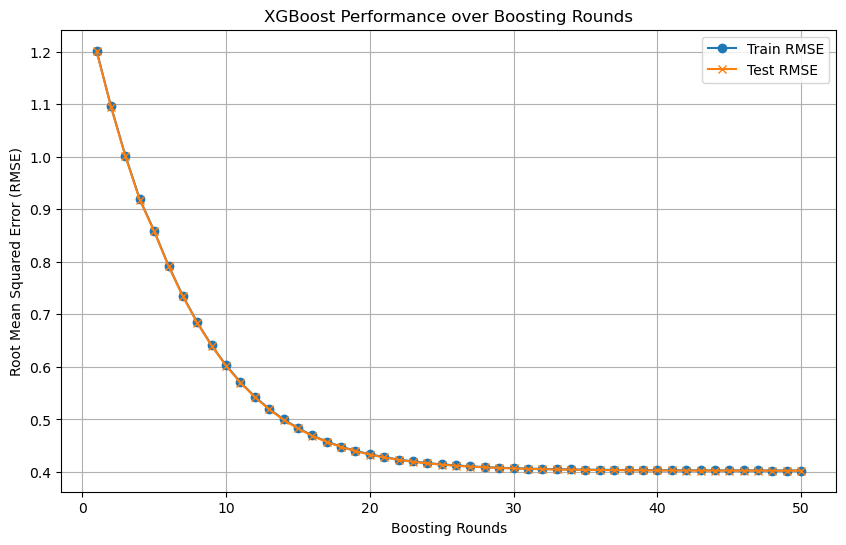

In [45]:
# Extract the evaluation history from the trained model
results = xgb_model.evals_result()

# Plot RMSE for each boosting round
epochs = range(1, len(results['validation_0']['rmse']) + 1)
train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_rmse, label='Train RMSE', marker='o')
plt.plot(epochs, test_rmse, label='Test RMSE', marker='x')
plt.xlabel('Boosting Rounds')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('XGBoost Performance over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.show()

Train MAE: 0.3279210856365003
Test MAE: 0.32716259351987637


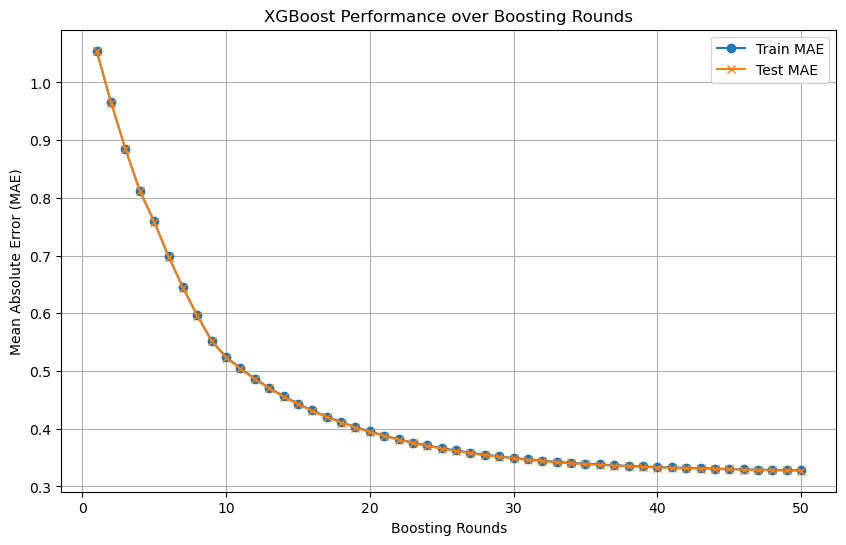

In [56]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.9,
    gamma=0,
    n_estimators=50,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum tree depth
    objective='reg:squarederror',  # Loss function for regression
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# Calculate MAE for both training and testing datasets
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Plotting can be done without evals
# Plotting MAE for the boosting rounds
epochs = range(1, xgb_model.n_estimators + 1)
train_mae_list = []
test_mae_list = []

# We need to compute MAE over boosting rounds manually
for i in epochs:
    # Set n_estimators to the current epoch
    xgb_model.set_params(n_estimators=i)
    xgb_model.fit(X_train, y_train)  # Refit model up to the i-th boosting round
    train_pred = xgb_model.predict(X_train)
    test_pred = xgb_model.predict(X_test)
    
    train_mae_list.append(mean_absolute_error(y_train, train_pred))
    test_mae_list.append(mean_absolute_error(y_test, test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mae_list, label='Train MAE', marker='o')
plt.plot(epochs, test_mae_list, label='Test MAE', marker='x')
plt.xlabel('Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('XGBoost Performance over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.show()

